# Libraries and Data

In [357]:
# Import Libraries
import copy
import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb

from scipy import stats
from scipy.special import boxcox1p
from scipy.stats import norm, skew

from sklearn.preprocessing import OrdinalEncoder

%matplotlib inline

pd.options.display.max_rows = None
pd.options.display.max_columns = None

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [358]:
# Import Dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Data Preparation
### 1. Exploration

In [359]:
# Review Data Structure
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [360]:
train.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN

In [361]:
train.shape

(1460, 81)

### 2. Cleaning

#### Train Dataset

In [362]:
# Quantify Missing Data by Feature
pd.DataFrame({'Percent Missing':(train.isnull().sum()/len(train)*100).sort_values(ascending=False)}).head(20)

,Percent Missing
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageCond,5.547945
GarageType,5.547945
GarageYrBlt,5.547945
GarageFinish,5.547945


In [363]:
# Impute Missing Data by Feature
train = train.fillna(value={'MiscFeature':'None', 'Alley':'None', 'Fence':'None', 'Electrical':'SBrkr',
                           'FireplaceQu':'None', 'GarageType':'None', 'GarageCond':'None',
                           'GarageFinish':'None', 'GarageQual':'None', 'GarageYrBlt':0, 'BsmtFinType1':'None',
                           'BsmtExposure':'None', 'BsmtQual':'None', 'BsmtCond':'None',
                           'BsmtFinType2':'None', 'MasVnrArea':0, 'MasVnrType':'None', 'PoolQC':'None'})
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].apply(lambda x: x.fillna(x.median()))

In [364]:
# Ensure Common Attributes Match Across Features
train['HasBsmt'] = 'NoData'
train.at[332, 'BsmtFinType2']='Unf'
train.at[948, 'BsmtExposure']='No'
for i in range(len(train)):
    if (train['BsmtQual'][i] != 'None') & (train['BsmtCond'][i] != 'None') & (train['BsmtExposure'][i] != 'None') \
        & (train['BsmtFinType1'][i] != 'None') & (train['BsmtFinType2'][i] != 'None') & (train['TotalBsmtSF'][i] > 0):
        train.at[i, 'HasBsmt'] = 'Yes'
    elif (train['BsmtQual'][i] == 'None') & (train['BsmtCond'][i] == 'None') & (train['BsmtExposure'][i] == 'None') \
        & (train['BsmtFinType1'][i] == 'None') & (train['BsmtFinType2'][i] == 'None') & (train['TotalBsmtSF'][i] == 0):
        train.at[i, 'HasBsmt'] = 'No'
    else: 
        train.at[i, 'HasBsmt'] = 'Unclear'

In [365]:
train['HasGarage'] = 'NoData'
for i in range(len(train)):
    if (train['GarageType'][i] != 'None') & (train['GarageYrBlt'][i] != 0) & (train['GarageFinish'][i] != 'None') \
        & (train['GarageCars'][i] > 0) & (train['GarageArea'][i] > 0) & (train['GarageQual'][i] != 'None') \
        & (train['GarageCond'][i] != 'None'):
        train.at[i, 'HasGarage'] = 'Yes'
    elif (train['GarageType'][i] == 'None') & (train['GarageYrBlt'][i] == 0) & (train['GarageFinish'][i] == 'None') \
        & (train['GarageCars'][i] == 0) & (train['GarageArea'][i] == 0) & (train['GarageQual'][i] == 'None') \
        & (train['GarageCond'][i] == 'None'):
        train.at[i, 'HasGarage'] = 'No'
    else: 
        train.at[i, 'HasGarage'] = 'Unclear'

In [366]:
train.shape

(1460, 83)

#### Test Dataset

In [367]:
# Quantify Missing Data by Feature
pd.DataFrame({'Percent Missing':(test.isnull().sum()/len(test)*100).sort_values(ascending=False)}).head(20)

,Percent Missing
PoolQC,99.794380
MiscFeature,96.504455
Alley,92.666210
Fence,80.123372
FireplaceQu,50.034270
LotFrontage,15.558602
GarageCond,5.346127
GarageQual,5.346127
GarageYrBlt,5.346127
GarageFinish,5.346127


In [368]:
# Impute Missing Data by Feature
test = test.fillna(value={'MiscFeature':'None', 'Alley':'None', 'Fence':'None', 'Electrical':'SBrkr',
                         'FireplaceQu':'None', 'GarageType':'None', 'GarageCond':'None',
                         'GarageFinish':'None', 'GarageQual':'None', 'GarageYrBlt':0, 'BsmtFinType1':'None',
                         'BsmtExposure':'None', 'BsmtQual':'None', 'BsmtCond':'None',
                         'BsmtFinType2':'None', 'MasVnrArea':0, 'MasVnrType':'None', 'PoolQC':'None'})
test['LotFrontage'] = test.groupby('Neighborhood')['LotFrontage'].apply(lambda x: x.fillna(x.median()))

In [369]:
# Ensure Common Attributes Match Across Features
test['HasBsmt'] = 'NoData'
test.at[27, 'BsmtExposure']='No'
test.at[580, 'BsmtCond']='TA'
test.at[725, 'BsmtCond']='TA'
test.at[757, 'BsmtQual']='TA'
test.at[758, 'BsmtQual']='TA'
test.at[888, 'BsmtExposure']='No'
test.at[1064, 'BsmtCond']='TA'
for i in range(len(test)):
    if (test['BsmtQual'][i] != 'None') & (test['BsmtCond'][i] != 'None') & (test['BsmtExposure'][i] != 'None') \
        & (test['BsmtFinType1'][i] != 'None') & (test['BsmtFinType2'][i] != 'None') & (test['TotalBsmtSF'][i] > 0):
        test.at[i, 'HasBsmt'] = 'Yes'
    elif (test['BsmtQual'][i] == 'None') & (test['BsmtCond'][i] == 'None') & (test['BsmtExposure'][i] == 'None') \
        & (test['BsmtFinType1'][i] == 'None') & (test['BsmtFinType2'][i] == 'None') & (test['TotalBsmtSF'][i] == 0):
        test.at[i, 'HasBsmt'] = 'No'
    else: 
        test.at[i, 'HasBsmt'] = 'Unclear'

In [370]:
test['HasGarage'] = 'NoData'
test.at[666, 'GarageYrBlt']=test.GarageYrBlt.median()
test.at[666, 'GarageFinish']='Unf'
test.at[666, 'GarageQual']='TA'
test.at[666, 'GarageCond']='TA'
test.at[1116, 'GarageYrBlt']=test.GarageYrBlt.median()
test.at[1116, 'GarageFinish']='Unf'
test.at[1116, 'GarageCars']=test.GarageCars.median()
test.at[1116, 'GarageArea']=test.GarageArea.median()
test.at[1116, 'GarageQual']='TA'
test.at[1116, 'GarageCond']='TA'
for i in range(len(test)):
    if (test['GarageType'][i] != 'None') & (test['GarageYrBlt'][i] != 0) & (test['GarageFinish'][i] != 'None') \
        & (test['GarageCars'][i] > 0) & (test['GarageArea'][i] > 0) & (test['GarageQual'][i] != 'None') \
        & (test['GarageCond'][i] != 'None'):
        test.at[i, 'HasGarage'] = 'Yes'
    elif (test['GarageType'][i] == 'None') & (test['GarageYrBlt'][i] == 0) & (test['GarageFinish'][i] == 'None') \
        & (test['GarageCars'][i] == 0) & (test['GarageArea'][i] == 0) & (test['GarageQual'][i] == 'None') \
        & (test['GarageCond'][i] == 'None'):
        test.at[i, 'HasGarage'] = 'No'
    else: 
        test.at[i, 'HasGarage'] = 'Unclear'

In [371]:
# More In-depth Cleaning
test[test.isnull().any(axis=1)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,HasBsmt,HasGarage
95,1556,50,RL,72.0,10632,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,1.5Fin,5,3,1917,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,Gd,Fa,No,Unf,0.0,Unf,0.0,689.0,689.0,GasA,Gd,N,SBrkr,725,499,0,1224,0.0,0.0,1,1,3,1,NaN,6,Mod,0,None,Detchd,1917.0,Unf,1.0,180.0,Fa,Fa,N,0,0,248,0,0,0,None,None,None,0,1,2010,COD,Normal,Yes,Yes
455,1916,30,NaN,109.0,21780,Grvl,None,Reg,Lvl,NaN,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,None,None,None,None,0.0,None,0.0,0.0,0.0,GasA,TA,N,FuseA,810,0,0,810,0.0,0.0,1,0,1,1,TA,4,Min1,0,None,Detchd,1975.0,Unf,1.0,280.0,TA,TA,N,119,24,0,0,0,0,None,None,None,0,3,2009,ConLD,Normal,No,Yes
485,1946,20,RL,63.0,31220,Pave,None,IR1,Bnk,NaN,FR2,Gtl,Gilbert,Feedr,Norm,1Fam,1Story,6,2,1952,1952,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1632.0,1632.0,GasA,TA,Y,FuseA,1474,0,0,1474,0.0,0.0,1,0,3,1,TA,7,Min2,2,Gd,Attchd,1952.0,Unf,2.0,495.0,TA,TA,Y,0,0,144,0,0,0,None,None,Shed,750,5,2008,WD,Normal,Yes,Yes
660,2121,20,RM,99.0,5940,Pave,None,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,None,None,None,None,NaN,None,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,None,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,None,MnPrv,None,0,4,2008,ConLD,Abnorml,Unclear,Yes
691,2152,30,RL,85.0,19550,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1940,2007,Flat,Tar&Grv,NaN,NaN,None,0.0,TA,TA,PConc,TA,TA,Gd,ALQ,1035.0,Unf,0.0,545.0,1580.0,GasA,Ex,Y,SBrkr,1518,0,0,1518,1.0,0.0,1,0,2,1,Fa,5,Typ,2,Gd,None,0.0,None,0.0,0.0,None,None,Y,0,39,0,0,0,0,None,None,None,0,1,2008,WD,Normal,Yes,No
728,2189,20,RL,123.0,47007,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,None,None,None,None,0.0,None,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,None,None,None,0,7,2008,WD,Normal,No,Yes
756,2217,20,NaN,80.0,14584,Pave,None,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,None,None,None,None,0.0,None,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,NaN,0,None,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,None,None,None,0,2,2008,WD,Abnorml,No,Yes
790,2251,70,NaN,60.0,56600,Pave,None,IR1,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2.5Unf,5,1,1900,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,686.0,686.0,GasA,Ex,Y,SBrkr,1150,686,0,1836,0.0,0.0,2,0,4,1,TA,7,Maj1,0,None,Detchd,1900.0,Unf,1.0,288.0,TA,Fa,N,0,0,0,0,0,0,None,None,None,0,1,2008,WD,Normal,Yes,Yes
1013,2474,50,RM,60.0,10320,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,4,1,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0.0,Unf,0.0,771.0,771.0,GasA,Fa,Y,SBrkr,866,504,114,1484,0.0,0.0,2,0,3,1,TA,6,NaN,0,None,Detchd,1910.0,Unf,1.0,264.0,TA,Fa,N,14,211,0,0,84,0,None,None,None,0,9,2007,COD,Abnorml,Ye

In [372]:
test = test.fillna(value={'MSZoning':'RL', 'Utilities':'AllPub', 'Exterior1st':'None', 'Exterior2nd':'None',
                         'BsmtFinSF1':0, 'BsmtFinSF2':0, 'BsmtUnfSF':0, 'TotalBsmtSF':0, 'BsmtFullBath': 0,
                         'BsmtHalfBath':0, 'Functional':'Typ', 'GarageCars':0, 'GarageArea':0, 'SaleType':'WD',
                         'KitchenQual':'TA'})

### 3. Feature Engineering

In [373]:
# Save Dataset Details
len_train = train.shape[0]
len_test = test.shape[0]
y_train = train['SalePrice'].to_frame()

In [374]:
# Combine Datasets
data = pd.concat((train, test), sort=False).reset_index(drop=True)

In [375]:
# Drop Uniform/Uninformative Features and SalePrice
data.drop('Id', axis=1, inplace=True)
data.drop('Street', axis=1, inplace=True)
data.drop('Utilities', axis=1, inplace=True)
data.drop('Condition2', axis=1, inplace=True)
data.drop('PoolQC', axis=1, inplace=True)
data.drop('PoolArea', axis=1, inplace=True)
data.drop('SalePrice', axis=1, inplace=True)

In [376]:
# Create New Features
data['HouseAge'] = 2020 - ((data['YearBuilt'] + data['YearRemodAdd']) / 2)
data['TotBath'] = (data['FullBath'] + (data['HalfBath'] / 2))
data.shape

(2919, 78)

In [377]:
# Correct Feature Properties and Attributes
data['GarageYrBlt'] = data['GarageYrBlt'].astype(float).astype(int)

to_float = ['LotArea', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
           '3SsnPorch', 'ScreenPorch']
data[to_float] = data[to_float].astype(float)

to_string = ['MSSubClass', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']
data[to_string] = data[to_string].astype(str)

to_int = ['BsmtFullBath', 'BsmtHalfBath']
data[to_int] = data[to_int].astype(int)

data['MSZoning'].replace('C (all)', 'C', inplace=True)

In [378]:
# Encode Heirarchical Features
heir_features = ['LotShape', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
                'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 
                'GarageCond', 'PavedDrive']
heir_order = [['IR3', 'IR2', 'IR1', 'Reg'], ['Sev', 'Mod', 'Gtl'], ['Po', 'Fa', 'TA', 'Gd', 'Ex'], ['Po', 'Fa', 'TA',
             'Gd', 'Ex'], ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
             ['None', 'No', 'Mn', 'Av', 'Gd'], ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], ['None', 'Unf',
             'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], ['Po', 'Fa', 'TA', 'Gd', 'Ex'], ['Po', 'Fa', 'TA', 'Gd', 'Ex'], 
             ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'], ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], 
             ['None', 'Unf', 'RFn', 'Fin'], ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], 
             ['N','P','Y']]

for i in range(len(heir_order)): 
    ord_en = OrdinalEncoder(categories={0:heir_order[i]})
    data.loc[:, heir_features[i]] = ord_en.fit_transform(data.loc[:, heir_features[i]].values.reshape(-1, 1))
data[heir_features] = data[heir_features].astype(int)

In [379]:
# Re-divide Train and Test
Train = copy.deepcopy(data[:len_train])
Train['SalePrice'] = y_train
Test = copy.deepcopy(data[len_test+1:])

In [380]:
print(Train.shape)
print(Test.shape)

(1460, 79)
(1459, 78)


# Quantitative Features

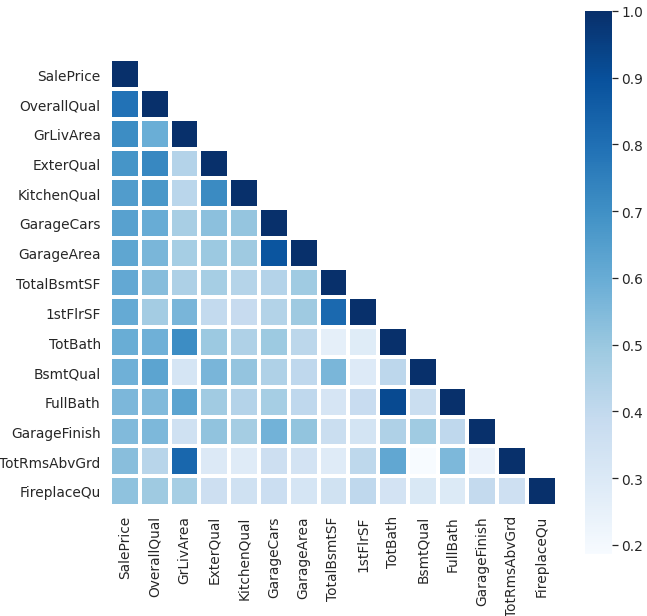

In [381]:
# Correlation Heatmap
n = 15
params = Train.corr().nlargest(n, 'SalePrice').index
coefs = np.corrcoef(Train[params].values.T)
mask = np.zeros_like(coefs)
mask[np.triu_indices_from(mask, 1)] = True
with sns.axes_style('white'):
    f, ax = plt.subplots(figsize=(10, 10))
    sns.set(font_scale=1.25)
    sns.heatmap(coefs, cmap='Blues', cbar=True, annot=False, square=True, fmt='.1f', annot_kws={'size':12},
                yticklabels=params.values, xticklabels=params.values, linewidths=3, linecolor='white', mask=mask)
#     plt.title('Feature Correlation Heatmap', fontsize=30, fontdict={'horizontalalignment':'center'},
#                pad=75)
    plt.savefig('CorrMap_15.png')

In [382]:
# Avoid Multicollinearity
Train.drop('GarageCars', axis=1, inplace=True)
Train.drop('FullBath', axis=1, inplace=True)
Train.drop('TotRmsAbvGrd', axis=1, inplace=True)
Train.drop('1stFlrSF', axis=1, inplace=True)
Test.drop('GarageCars', axis=1, inplace=True)
Test.drop('FullBath', axis=1, inplace=True)
Test.drop('TotRmsAbvGrd', axis=1, inplace=True)
Test.drop('1stFlrSF', axis=1, inplace=True)

[Text(0.5, 0, 'Living Area')]

[Text(0.5, 0, 'Garage Area')]

[Text(0.5, 0, 'Basement SF')]

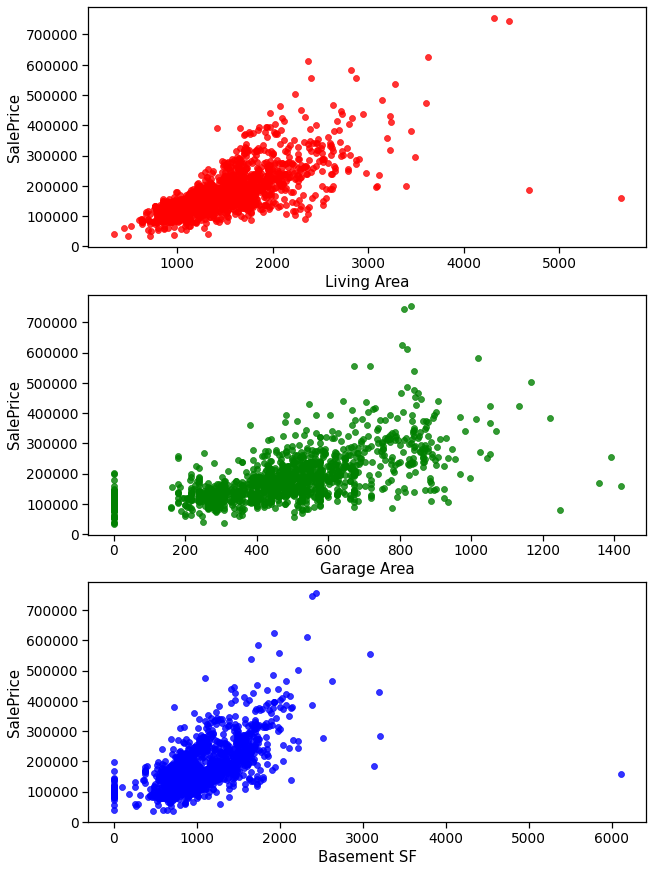

In [383]:
# Visualize
f, axs = plt.subplots(3, 1, figsize=(10, 15))
sns.scatterplot('GrLivArea', 'SalePrice', data=Train, ax=axs[0], edgecolor=None,
                color='red', alpha=0.8).set(xlabel='Living Area')
sns.scatterplot('GarageArea', 'SalePrice', data=Train, ax=axs[1], edgecolor=None,
                color='green', alpha=0.8).set(xlabel='Garage Area')
sns.scatterplot('TotalBsmtSF', 'SalePrice', data=Train, ax=axs[2], edgecolor=None,
                color='blue', alpha=0.8).set(xlabel='Basement SF')

In [384]:
# Drop Outliers
Train.sort_values(by='GrLivArea', ascending=False)[:2]
Train.drop([1298, 523], axis=0, inplace=True)

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,HasBsmt,HasGarage,HouseAge,TotBath,SalePrice
1298,60,RL,313.0,63887.0,None,0,Bnk,Corner,2,Edwards,Feedr,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,4,2,PConc,5,3,4,6,5644.0,1,0.0,466.0,6110.0,GasA,4,Y,SBrkr,950.0,0.0,5642.0,2,0,1,3,1,4,7,3,4,Attchd,2008,3,1418.0,3,3,2,214.0,292.0,0.0,0.0,0.0,None,None,0,1,2008,New,Partial,Yes,Yes,12.0,2.5,160000
523,60,RL,130.0,40094.0,None,2,Bnk,Inside,2,Edwards,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,4,2,PConc,5,3,4,6,2260.0,1,0.0,878.0,3138.0,GasA,4,Y,SBrkr,1538.0,0.0,4676.0,1,0,1,3,1,4,7,1,4,BuiltIn,2007,3,884.0,3,3,2,208.0,406.0,0.0,0.0,0.0,None,None,0,10,2007,New,Partial,Yes,Yes,12.5,3.5,184750


In [385]:
Train.sort_values(by='TotalBsmtSF', ascending=False)[:1]
Train.drop([332], axis=0, inplace=True)

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,HasBsmt,HasGarage,HouseAge,TotBath,SalePrice
332,20,RL,85.0,10655.0,None,2,Lvl,Inside,2,NridgHt,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,3,2,PConc,4,3,1,6,1124.0,1,479.0,1603.0,3206.0,GasA,4,Y,SBrkr,0.0,0.0,1629.0,1,0,0,3,1,3,7,1,4,Attchd,2003,2,880.0,3,3,2,0.0,0.0,0.0,0.0,0.0,None,None,0,10,2009,WD,Normal,Yes,Yes,16.5,2.0,284000


# Qualitative Features

In [386]:
# View Qualitative Features
qual_features = Train.dtypes[Train.dtypes == 'object'].index
print(', '.join(str(p) for p in qual_features)) 

MSSubClass, MSZoning, Alley, LandContour, LotConfig, Neighborhood, Condition1, BldgType, HouseStyle, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, Foundation, Heating, CentralAir, Electrical, GarageType, GarageYrBlt, Fence, MiscFeature, MoSold, YrSold, SaleType, SaleCondition, HasBsmt, HasGarage


In [387]:
# Order Feature Attributes by Mean Sale Price
order_overallqual = Train.groupby('OverallQual')['SalePrice'].mean().sort_values(ascending=False).index
order_housestyle = Train.groupby('HouseStyle')['SalePrice'].mean().sort_values(ascending=False).index
order_mssubclass = Train.groupby('MSSubClass')['SalePrice'].mean().sort_values(ascending=False).index
order_mszoning = Train.groupby('MSZoning')['SalePrice'].mean().sort_values(ascending=False).index
order_neighborhood = Train.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False).index
order_garagetype = Train.groupby('GarageType')['SalePrice'].mean().sort_values(ascending=False).index
order_yearbuilt = Train.groupby('YearBuilt')['SalePrice'].mean().sort_values(ascending=True).index

[Text(0.5, 0, 'Sale Price')]

[Text(0.5, 0, 'Sale Price')]

[Text(0.5, 0, 'Sale Price')]

[Text(0.5, 0, 'Sale Price')]

[Text(0.5, 0, 'Sale Price')]

[Text(0.5, 0, 'Sale Price')]

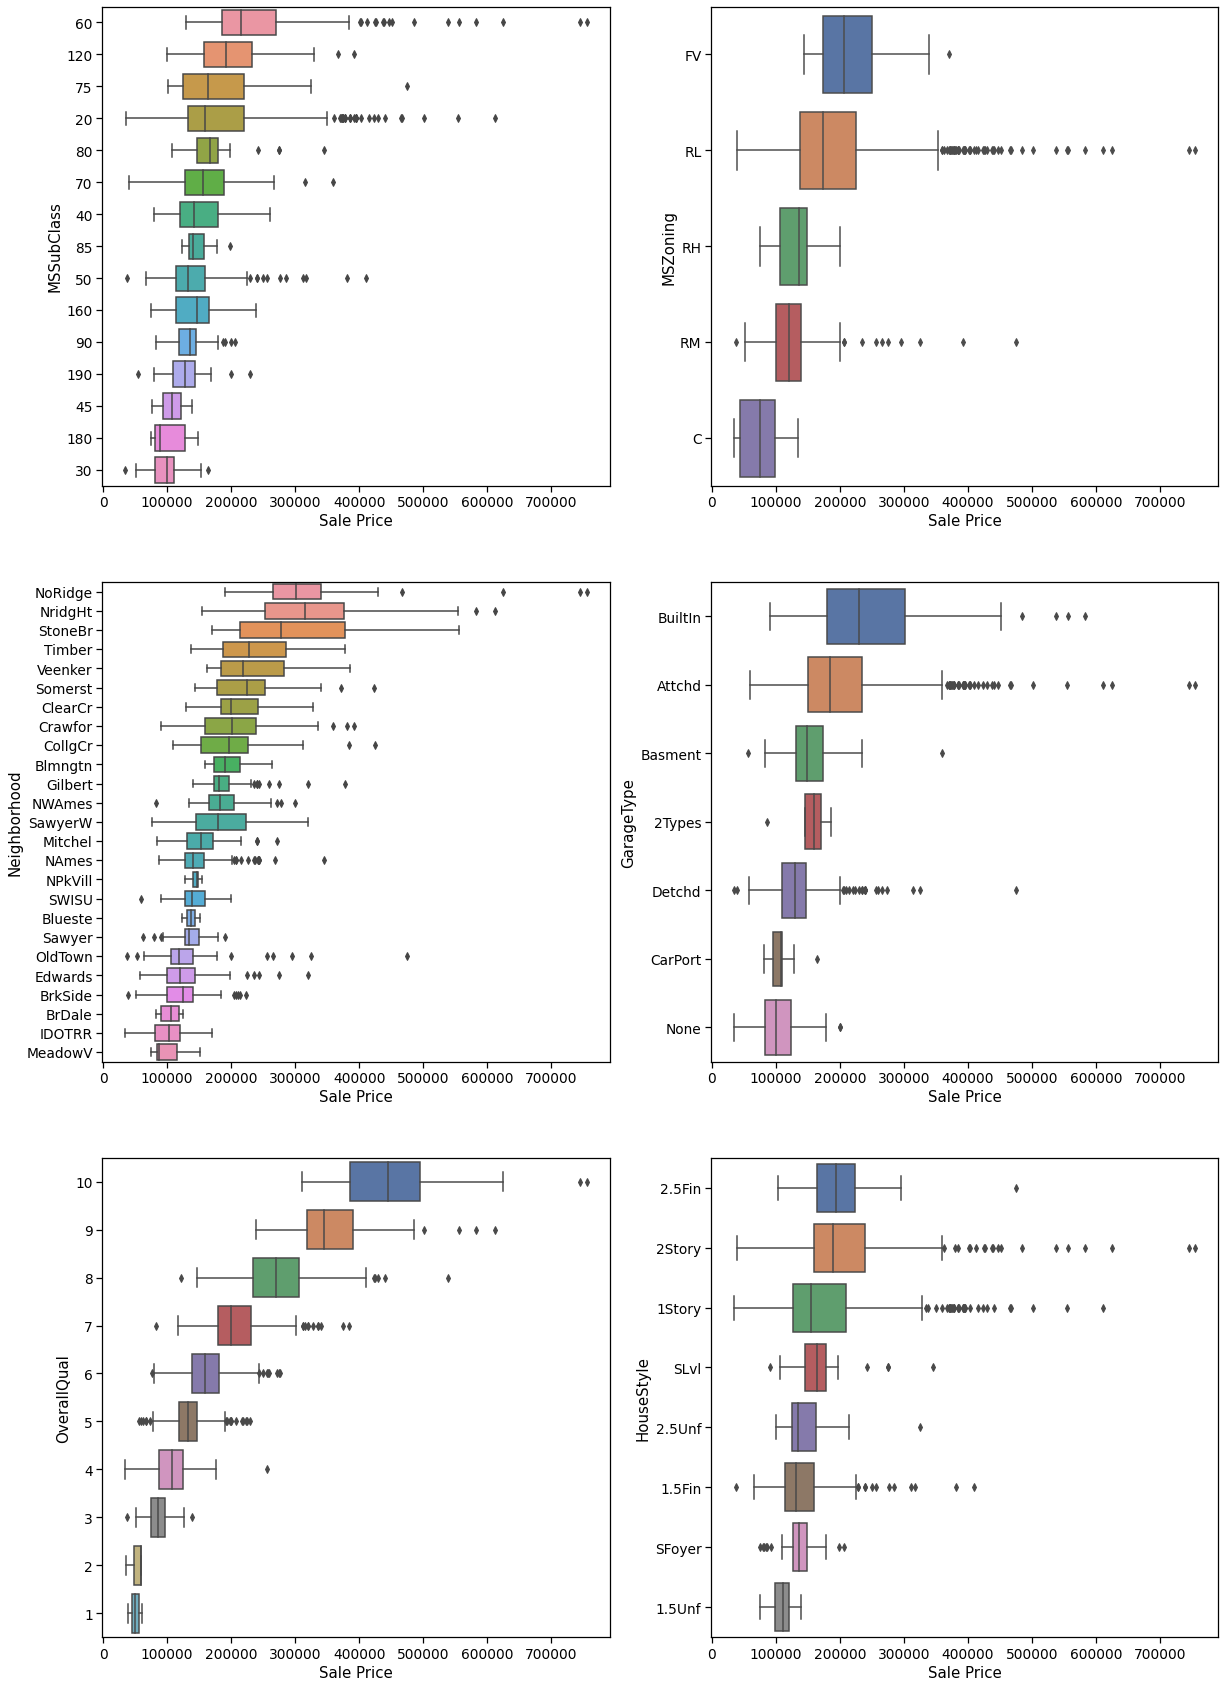

In [388]:
f, axs = plt.subplots(3, 2, figsize=(20, 30))

sns.boxplot('SalePrice', 'OverallQual', data=Train, orient='h', 
            order=order_overallqual, ax=axs[2, 0]).set(xlabel='Sale Price')
sns.boxplot('SalePrice', 'HouseStyle', data=Train, orient='h', 
            order=order_housestyle, ax=axs[2, 1]).set(xlabel='Sale Price')
sns.boxplot('SalePrice', 'MSSubClass', data=Train, orient='h', 
            order=order_mssubclass, ax=axs[0, 0]).set(xlabel='Sale Price')
sns.boxplot('SalePrice', 'MSZoning', data=Train, orient='h', 
            order=order_mszoning, ax=axs[0, 1]).set(xlabel='Sale Price')
sns.boxplot('SalePrice', 'Neighborhood', data=Train, orient='h', 
            order=order_neighborhood, ax=axs[1, 0]).set(xlabel='Sale Price')
sns.boxplot('SalePrice', 'GarageType', data=Train, orient='h', 
            order=order_garagetype, ax=axs[1, 1]).set(xlabel='Sale Price')
# plt.savefig('Qual_Feat_Boxplots.png')

In [389]:
high_5 = list(order_neighborhood[:5])
low_5 = list(order_neighborhood[-5:])
HL_5 = high_5 + low_5
HL_Train = Train[Train['Neighborhood'].isin(HL_5)]

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1632319f688>)

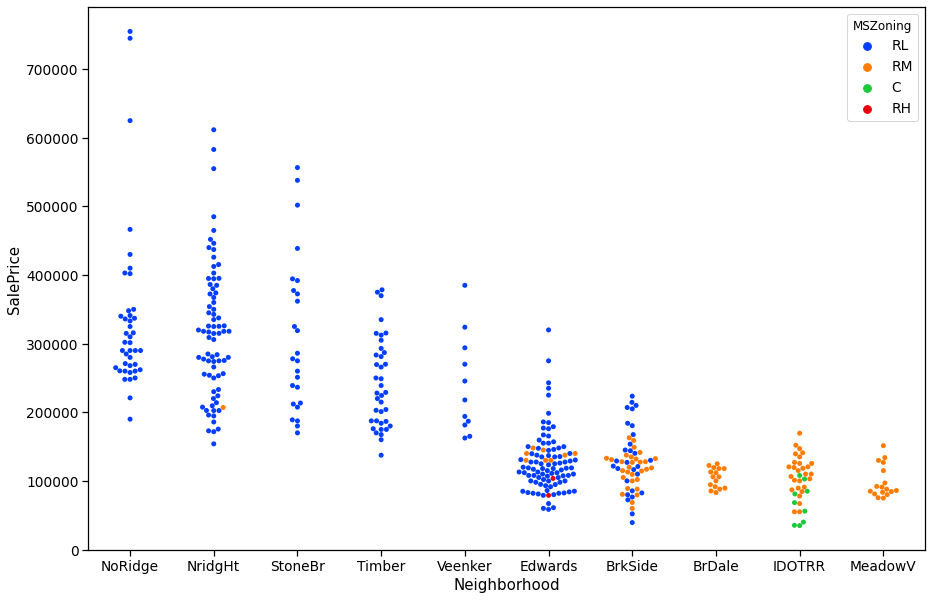

In [390]:
plt.subplots(figsize=(15, 10))
sns.swarmplot('Neighborhood', 'SalePrice', data=HL_Train, hue='MSZoning', palette=('bright'), order=HL_5)

(<Figure size 1800x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x16325db62c8>)

Text(0.5, 0, 'Year Built')

Text(0, 0.5, 'Sale Price')

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text major ticklabel objects>)

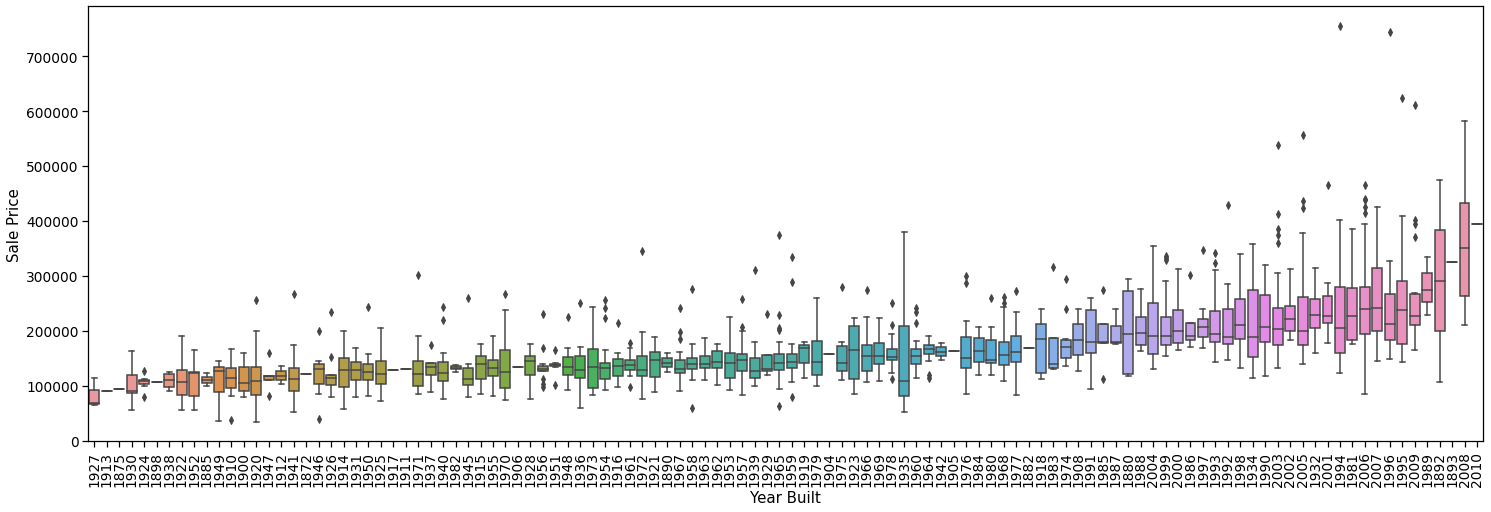

In [391]:
plt.subplots(figsize=(25, 8))
sns.boxplot('YearBuilt', 'SalePrice', data=Train, order=order_yearbuilt)
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.xticks(rotation=90)

# Normalize Data
### 1. Response Variable

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'Sale Price')

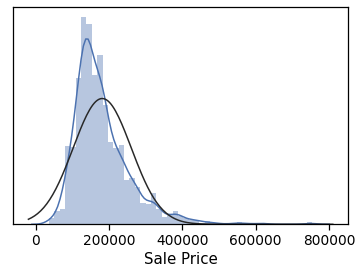

In [392]:
# SalePrice Distribution
sns.distplot(Train['SalePrice'], fit=norm)
plt.yticks([])
plt.xlabel('Sale Price')
plt.ticklabel_format(style='plain', axis='y')

<Figure size 432x288 with 0 Axes>

((array([-3.30456314, -3.04731426, -2.90425334, ...,  2.90425334,
          3.04731426,  3.30456314]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)),
 (74179.16563288086, 180862.17982155117, 0.9318046659462815))

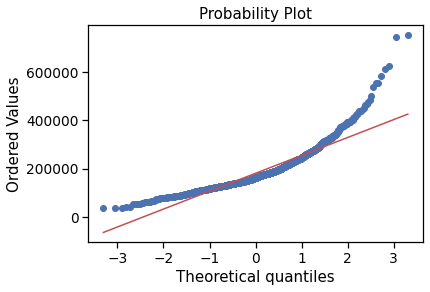

In [393]:
# SalePrice QQ-Plot
plt.figure()
stats.probplot(Train['SalePrice'], plot=plt)
plt.show()

In [394]:
# Log Transform to Correct Right-Skew
Train['SalePrice'] = np.log1p(Train['SalePrice'])

Text(0.5, 0, 'Sale Price (log)')

([], <a list of 0 Text major ticklabel objects>)

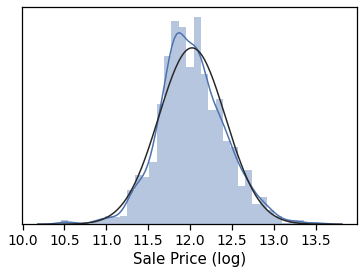

In [395]:
# Corrected SalePrice Distribution
sns.distplot(Train['SalePrice'], fit=norm)
plt.xlabel('Sale Price (log)')
plt.yticks([])

<Figure size 432x288 with 0 Axes>

((array([-3.30456314, -3.04731426, -2.90425334, ...,  2.90425334,
          3.04731426,  3.30456314]),
  array([10.46027076, 10.47197813, 10.54273278, ..., 13.34550853,
         13.52114084, 13.53447435])),
 (0.39841027923243993, 12.023649529133078, 0.9953589482082562))

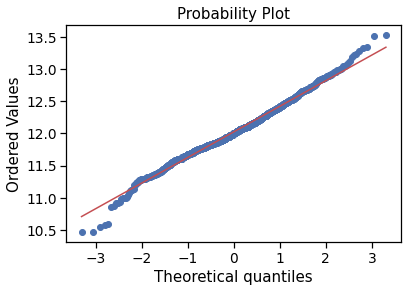

In [396]:
# SalePrice QQ-Plot
plt.figure()
stats.probplot(Train['SalePrice'], plot=plt)
plt.show()

### 2. Explanatory Variables

In [397]:
# View Quantitative Features
quant_features = list(Train.dtypes[Train.dtypes != 'object'].index)
quant_features.pop(-1)
print(', '.join(str(p) for p in quant_features)) 

'SalePrice'

LotFrontage, LotArea, LotShape, LandSlope, OverallQual, OverallCond, MasVnrArea, ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, HeatingQC, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, Functional, Fireplaces, FireplaceQu, GarageFinish, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, MiscVal, HouseAge, TotBath


In [398]:
# Test for Skew
len_Train = Train.shape[0]
len_Test = Test.shape[0]
all_data = pd.concat((Train, Test)).reset_index(drop=True)
quant_skew = pd.DataFrame({'Skew':(all_data[quant_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False))})
quant_skew.head(10)

,Skew
MiscVal,21.935910
LotArea,13.107345
LowQualFinSF,12.082427
3SsnPorch,11.370087
KitchenAbvGr,4.299698
BsmtFinSF2,4.154552
EnclosedPorch,4.001570
ScreenPorch,3.944305
BsmtHalfBath,3.929197
BsmtFinType2,3.152737


In [399]:
# Adjust High Skew Using Box Cox Transformation
lam = 0.15

high_skew = quant_skew[quant_skew['Skew'].abs() > 1]
skewed_features = high_skew.index
for feature in skewed_features:
    all_data[feature] = boxcox1p(all_data[feature], lam)

In [400]:
# Check Adjusted Skew
adj_skew = pd.DataFrame({'Skew':(all_data[quant_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False))})
adj_skew.head(10)

,Skew
3SsnPorch,8.920063
LowQualFinSF,8.739474
MiscVal,5.593914
BsmtHalfBath,3.785906
KitchenAbvGr,3.696542
ScreenPorch,2.976380
BsmtFinSF2,2.568509
BsmtFinType2,2.119240
EnclosedPorch,2.023751
BsmtFinSF1,0.982006


### 3. Visual Check

In [401]:
Train = all_data[:len_Train]
Test = all_data[len_Train:]

[Text(0.5, 0, 'Living Area')]

[Text(0.5, 0, 'Garage Area')]

[Text(0.5, 0, 'Basement SF')]

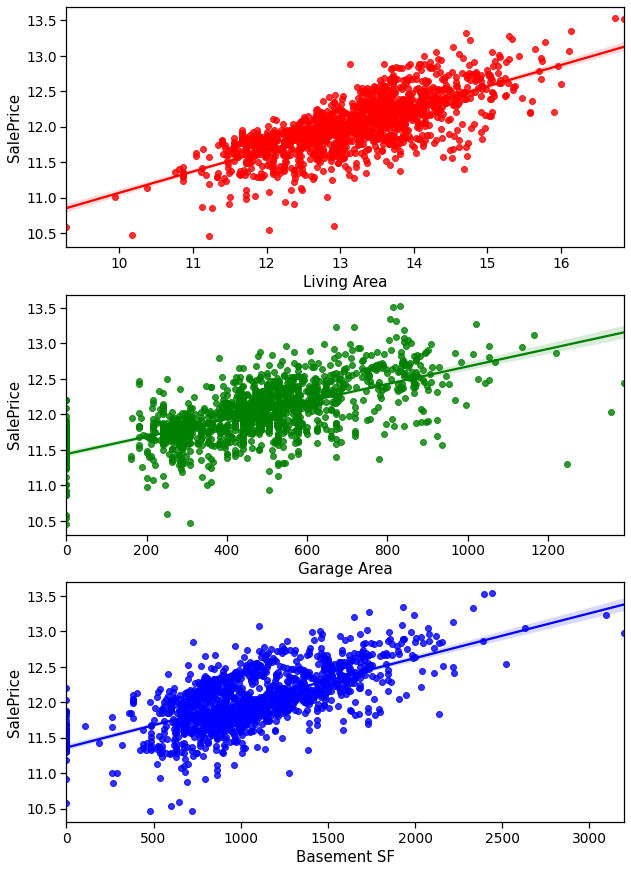

In [402]:
f, axs = plt.subplots(3, 1, figsize=(10, 15))
sns.regplot('GrLivArea', 'SalePrice', data=Train, ax=axs[0], fit_reg=True,
                color='red').set(xlabel='Living Area')
sns.regplot('GarageArea', 'SalePrice', data=Train, ax=axs[1], fit_reg=True,
                color='green').set(xlabel='Garage Area')
sns.regplot('TotalBsmtSF', 'SalePrice', data=Train, ax=axs[2], fit_reg=True,
                color='blue').set(xlabel='Basement SF')

# Modeling
### 1. Preparation

In [403]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet, Lasso, Ridge, BayesianRidge, LassoLarsIC, LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score, train_test_split, StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

In [408]:
# Define Train and Test and Drop Target Variable
Y_train = Train['SalePrice']
Train.drop('SalePrice', axis=1, inplace=True)
Test.drop('SalePrice', axis=1, inplace=True)

C:\Users\Work\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [409]:
# Combine Train and Test
Data = pd.concat([Train, Test], axis=0)
Data.shape

(2916, 74)

In [410]:
# Create Dummy Variables and Re-split Data into Train and Test
Data = pd.get_dummies(Data)
X_train = copy.deepcopy(Data[:len_Train])
X_test = copy.deepcopy(Data[len_Train:])
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)

(1457, 530)
(1457,)
(1459, 530)


In [412]:
# Train Test Split from Original Train for Validation
X_train_train, X_train_test, Y_train_train, Y_train_test = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)
print(X_train_train.shape)
print(X_train_test.shape)
print(Y_train_train.shape)
print(Y_train_test.shape)

(1092, 530)
(365, 530)
(1092,)
(365,)


###  2. Building and Testing Models

In [413]:
# Ridge Regression
ridge = make_pipeline(RobustScaler(), Ridge())
ridge.fit(X_train_train, Y_train_train)
ridge_pred = ridge.predict(X_train_test)
ridge_mse = mean_squared_error(Y_train_test, ridge_pred)
ridge_rmse = np.sqrt(ridge_mse)
ridge_rmse

Pipeline(steps=[('robustscaler', RobustScaler()), ('ridge', Ridge())])

0.12810593241944523

In [414]:
# Lasso Regression
lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=1))
lasso.fit(X_train_train, Y_train_train)
lasso_pred = lasso.predict(X_train_test)
lasso_mse = mean_squared_error(Y_train_test, lasso_pred)
lasso_rmse = np.sqrt(lasso_mse)
lasso_rmse

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('lasso', Lasso(alpha=0.0005, random_state=1))])

0.10892929142467953

In [415]:
# Elastic Net Regression
enet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=0.9, random_state=3))
enet.fit(X_train_train, Y_train_train)
enet_pred = enet.predict(X_train_test)
enet_mse = mean_squared_error(Y_train_test, enet_pred)
enet_rmse = np.sqrt(enet_mse)
enet_rmse

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('elasticnet',
                 ElasticNet(alpha=0.0005, l1_ratio=0.9, random_state=3))])

0.10917734591779465

In [416]:
# Gradient Boost Regression
gboost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
gboost.fit(X_train_train, Y_train_train)
gboost_pred = gboost.predict(X_train_test)
gboost_mse = mean_squared_error(Y_train_test, gboost_pred)
gboost_rmse = np.sqrt(gboost_mse)
gboost_rmse

GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=4,
                          max_features='sqrt', min_samples_leaf=15,
                          min_samples_split=10, n_estimators=3000,
                          random_state=5)

0.12349272868894155

[Text(0, 0.5, 'Actual Sale Price (log)'),
 Text(0.5, 0, 'Predicted Sale Price (log)'),
 Text(0.5, 1.0, 'Ridge Regression')]

[Text(0, 0.5, 'Actual Sale Price (log)'),
 Text(0.5, 0, 'Predicted Sale Price (log)'),
 Text(0.5, 1.0, 'Lasso Regression')]

[Text(0, 0.5, 'Actual Sale Price (log)'),
 Text(0.5, 0, 'Predicted Sale Price (log)'),
 Text(0.5, 1.0, 'ENet Regression')]

[Text(0, 0.5, 'Actual Sale Price (log)'),
 (10.35, 13.65),
 Text(0.5, 0, 'Predicted Sale Price (log)'),
 Text(0.5, 1.0, 'GBoost Regression')]

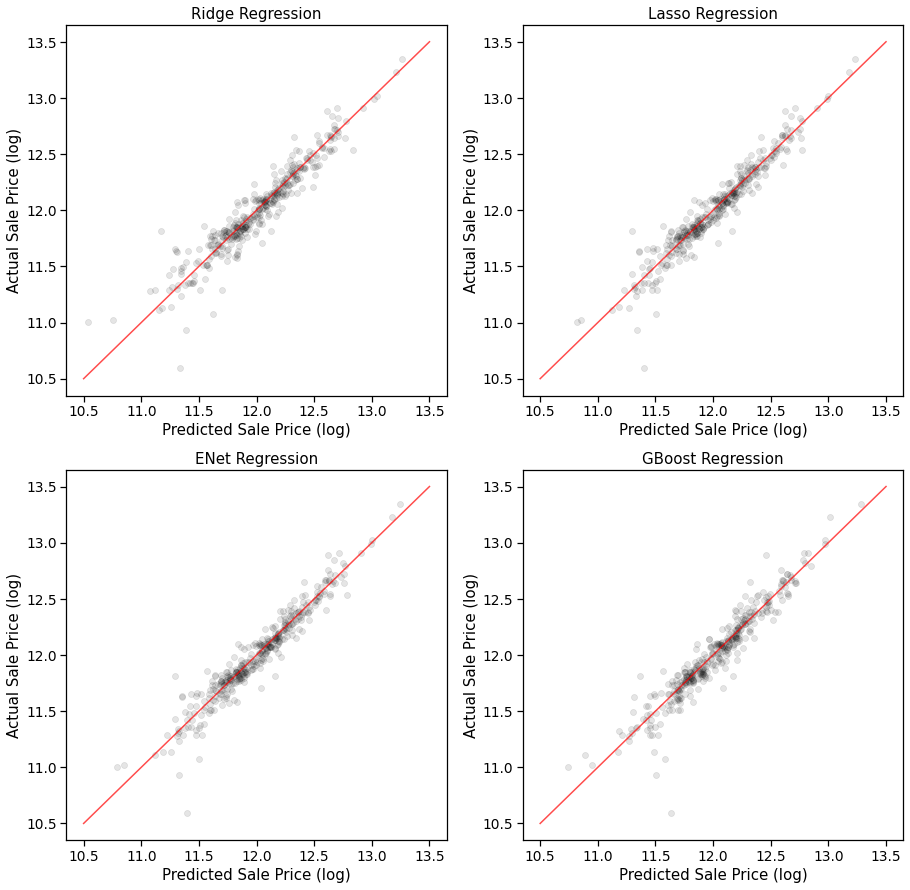

In [417]:
# Visualize Predicted vs Real Values
f, axs = plt.subplots(2, 2, figsize=(15, 15))
sns.scatterplot(ridge_pred, Y_train_test, ax=axs[0, 0], 
                edgecolor=None, alpha=0.1, color='black').set(title='Ridge Regression', 
                                                              xlabel='Predicted Sale Price (log)',
                                                              ylabel='Actual Sale Price (log)')
axs[0, 0].plot([10.5, 13.5], [10.5, 13.5], c = 'red', alpha=0.7)
sns.scatterplot(lasso_pred, Y_train_test, ax=axs[0, 1], 
                edgecolor=None, alpha=0.1, color='black').set(title='Lasso Regression', 
                                                              xlabel='Predicted Sale Price (log)',
                                                              ylabel='Actual Sale Price (log)')
axs[0, 1].plot([10.5, 13.5], [10.5, 13.5], c = 'red', alpha=0.7)
sns.scatterplot(enet_pred, Y_train_test, ax=axs[1, 0], 
                edgecolor=None, alpha=0.1, color='black').set(title='ENet Regression', 
                                                              xlabel='Predicted Sale Price (log)',
                                                              ylabel='Actual Sale Price (log)')
axs[1, 0].plot([10.5, 13.5], [10.5, 13.5], c = 'red', alpha=0.7)
sns.scatterplot(gboost_pred, Y_train_test, ax=axs[1, 1], 
                edgecolor=None, alpha=0.1, color='black').set(title='GBoost Regression', 
                                                              xlabel='Predicted Sale Price (log)',
                                                              ylabel='Actual Sale Price (log)',
                                                              xlim=[10.35, 13.65])
axs[1, 1].plot([10.5, 13.5], [10.5, 13.5], c = 'red', alpha=0.7)
plt.show()

In [418]:
# Cross-validation
folds = KFold(n_splits=10)
def get_score(model):
    score = np.sqrt(-cross_val_score(model, X_train, Y_train, scoring='neg_mean_squared_error', cv=folds))
    return(score)

In [419]:
# Ridge Regression (CV)
ridge_score = get_score(ridge)
print('Ridge Regression (CV)\nMean: {:.4f}\nStDev: {:.4f}'.format(ridge_score.mean(), ridge_score.std()))

Ridge Regression (CV)
Mean: 0.1197
StDev: 0.0100


In [420]:
# Lasso Regression (CV)
lasso_score = get_score(lasso)
print('Lasso Regression (CV)\nMean: {:.4f}\nStDev: {:.4f}'.format(lasso_score.mean(), lasso_score.std()))

Lasso Regression (CV)
Mean: 0.1089
StDev: 0.0134


In [421]:
# Elastic Net Regression (CV)
enet_score = get_score(enet)
print('Elastic Net Regression (CV)\nMean: {:.4f}\nStDev: {:.4f}'.format(enet_score.mean(), enet_score.std()))

Elastic Net Regression (CV)
Mean: 0.1089
StDev: 0.0133


In [68]:
# Gradient Boost Regression (CV)
gboost_score = get_score(gboost)
print('Gradient Boost Regression (CV)\nMean: {:.4f}\nStDev: {:.4f}'.format(gboost_score.mean(), gboost_score.std()))

Gradient Boost Regression (CV)
Mean: 0.1143
StDev: 0.0155


### 3. Stacking Models
(work in progress)

# Submission

In [422]:
# Predict
lasso.fit(X_train, Y_train)
test_pred = np.expm1(lasso.predict(X_test))

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('lasso', Lasso(alpha=0.0005, random_state=1))])

In [438]:
test['SalePrice'] = test_pred
test['SalePrice'] = test['SalePrice'].astype(int)
Submission = test
Submission.head(10)
Submission.to_csv('submission.csv', index=False)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,HasBsmt,HasGarage,SalePrice
0,1461,20,RH,80.0,11622,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,None,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,None,MnPrv,None,0,6,2010,WD,Normal,Yes,Yes,124277
1,1462,20,RL,81.0,14267,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,None,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,None,None,Gar2,12500,6,2010,WD,Normal,Yes,Yes,158317
2,1463,60,RL,74.0,13830,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,None,MnPrv,None,0,3,2010,WD,Normal,Yes,Yes,184786
3,1464,60,RL,78.0,9978,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,None,None,None,0,6,2010,WD,Normal,Yes,Yes,201967
4,1465,120,RL,43.0,5005,Pave,None,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,None,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,None,None,None,0,1,2010,WD,Normal,Yes,Yes,196245
5,1466,60,RL,75.0,10000,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,763.0,763.0,GasA,Gd,Y,SBrkr,763,892,0,1655,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1993.0,Fin,2.0,440.0,TA,TA,Y,157,84,0,0,0,0,None,None,None,0,4,2010,WD,Normal,Yes,Yes,172329
6,1467,20,RL,63.0,7980,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,1187,0,0,1187,1.0,0.0,2,0,3,1,TA,6,Typ,0,None,Attchd,1992.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,None,GdPrv,Shed,500,3,2010,WD,Normal,Yes,Yes,174024
7,1468,60,RL,63.0,8402,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,789.0,789.0,GasA,Gd,Y,SBrkr,789,676,0,1465,0.0,0.0,2,1,3,1,TA,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,393.0,TA,TA,Y,0,75,0,0,0,0,None,None,None,0,5,2010,WD,Normal,Yes,Yes,161274
8,1469,20,RL,85.0,10176,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,7,5,1990,1990,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,Gd,GLQ,637.0,Unf,0.0,663.0,1300.0,GasA,Gd,Y,SBrkr,1341,0,0,1341,1.0,0.0,1,1,2,1,Gd,5,Typ,1,Po,Attchd,1990.0,

(array([ 17.,  49., 135., 251., 269., 167., 157., 112.,  81.,  63.,  38.,
         32.,  22.,  22.,  15.,   9.,   4.,   4.,   3.,   4.,   3.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([  42365.  ,   65261.98,   88158.96,  111055.94,  133952.92,
         156849.9 ,  179746.88,  202643.86,  225540.84,  248437.82,
         271334.8 ,  294231.78,  317128.76,  340025.74,  362922.72,
         385819.7 ,  408716.68,  431613.66,  454510.64,  477407.62,
         500304.6 ,  523201.58,  546098.56,  568995.54,  591892.52,
         614789.5 ,  637686.48,  660583.46,  683480.44,  706377.42,
         729274.4 ,  752171.38,  775068.36,  797965.34,  820862.32,
         843759.3 ,  866656.28,  889553.26,  912450.24,  935347.22,
         958244.2 ,  981141.18, 1004038.16, 1026935.14, 1049832.12,
        1072729.1 , 1095626.08, 1118523.06, 11

(array([ 11.,  38.,  99., 232., 273., 218., 176., 104.,  93.,  58.,  42.,
         35.,  24.,  10.,  17.,   8.,   7.,   4.,   2.,   1.,   1.,   2.,
          1.,   0.,   2.,   0.,   0.,   0.,   0.,   2.]),
 array([ 34900.        ,  58903.33333333,  82906.66666667, 106910.        ,
        130913.33333333, 154916.66666667, 178920.        , 202923.33333333,
        226926.66666667, 250930.        , 274933.33333333, 298936.66666667,
        322940.        , 346943.33333333, 370946.66666667, 394950.        ,
        418953.33333333, 442956.66666667, 466960.        , 490963.33333333,
        514966.66666667, 538970.        , 562973.33333333, 586976.66666667,
        610980.        , 634983.33333333, 658986.66666667, 682990.        ,
        706993.33333333, 730996.66666667, 755000.        ]),
 <a list of 30 Patch objects>)

Text(0.5, 1.0, 'Submission Comparison')

(25000.0, 600000.0)

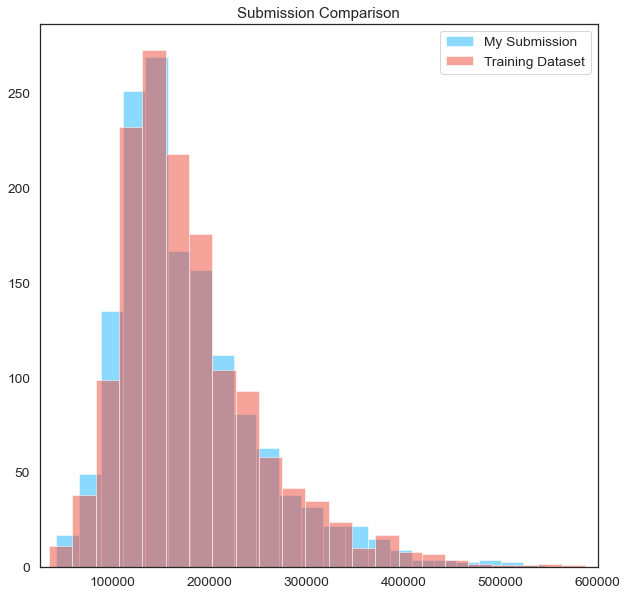

In [500]:
red_blue = ['#19B5FE', '#EF4836']
palette = sns.color_palette(red_blue)
sns.set_palette(palette)
sns.set_style('white')

fig, axs = plt.subplots(figsize=(10, 10))

plt.hist(Submission['SalePrice'], alpha=0.5, bins=50, label='My Submission')
plt.hist(train['SalePrice'], alpha=0.5, bins=30, label='Training Dataset')
plt.title('Submission Comparison')
plt.legend(loc='upper right')
axs.set_xlim(25000, 600000)